# **Codsoft Task 1**

## Titanic Survival Prediction

Dataset link - https://raw.githubusercontent.com/s-yogeshwaran/CODSOFT-ds/main/titanic_dataset.csv

## Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#To avoid warnings
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/s-yogeshwaran/CODSOFT-ds/main/titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Dataset information

In [3]:
print(f"no.of rows = {df.shape[0]}")
print(f"no.of columns = {df.shape[1]}")

no.of rows = 418
no.of columns = 12


In [4]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
#Statistical measures of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

0 - Non survived

1 - survived

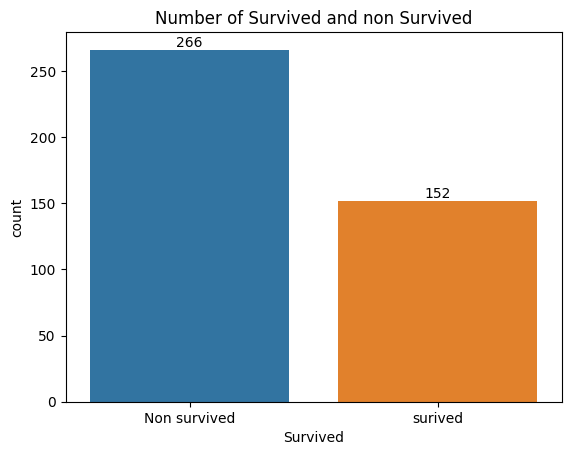

In [7]:
splot = sns.countplot(x = 'Survived', data = df)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')
plt.title('Number of Survived and non Survived')
plt.xticks(range(2) , labels=['Non survived', 'surived'])
plt.show()

In [8]:
#Checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df = df.dropna(subset=['Cabin','Age','Fare']).reset_index(drop=True)

In [10]:
#Checking for null values after removing the columns
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
# Performing lebel encoding.
df['sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1
1,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1
2,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1
3,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,1
4,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,0


In [12]:
# Perform One Hot encoding.
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,sex,Embarked_Q,Embarked_S
0,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,1,0,1
1,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,1,0,1
2,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,1,0,0
3,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,1,0,0
4,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,0,0,1


In [13]:
# Removed unwanted column.
df= df.drop(columns=['Cabin','Ticket','Sex','Name','PassengerId'])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,Embarked_Q,Embarked_S
0,1,1,23.0,1,0,82.2667,1,0,1
1,1,1,47.0,1,0,61.1750,1,0,1
2,1,1,48.0,1,3,262.3750,1,0,0
3,1,1,22.0,0,1,61.9792,1,0,0
4,0,1,41.0,0,0,30.5000,0,0,1


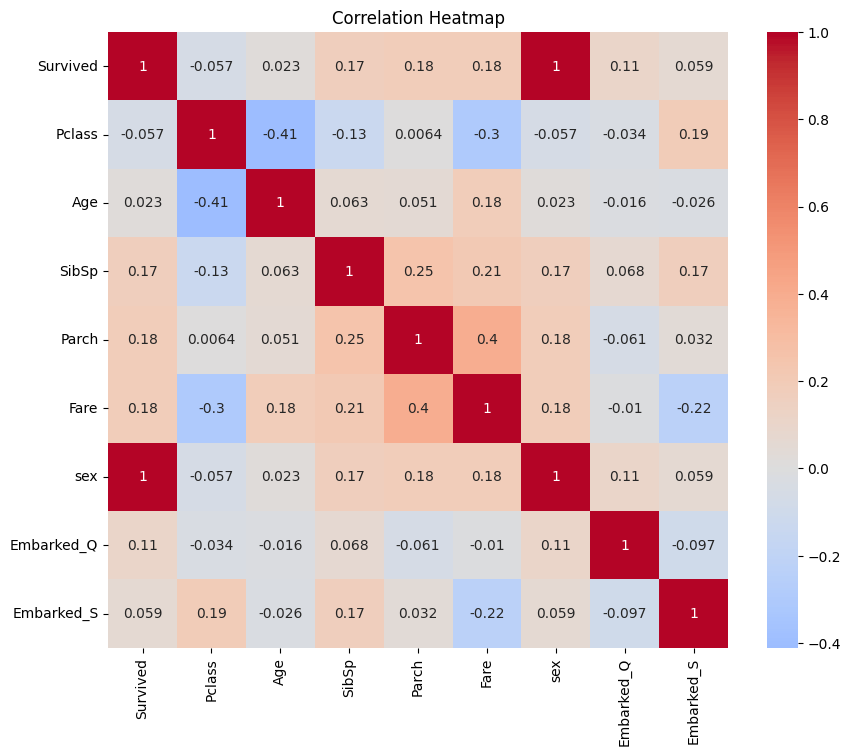

In [14]:
# create Heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

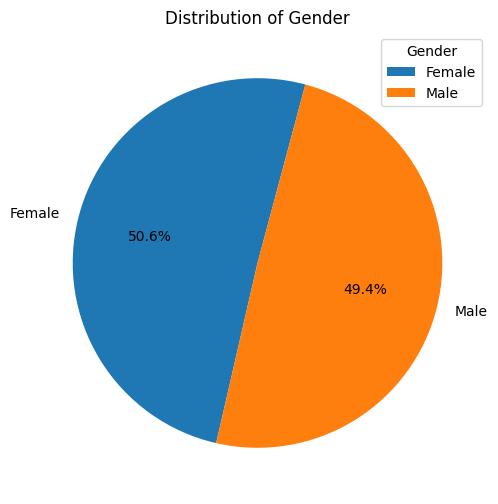

In [15]:
# Create Pie-chart for Gender distribution.
gender_counts = df['sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=75)
plt.title("Distribution of Gender")
plt.legend(title = 'Gender')
plt.show()

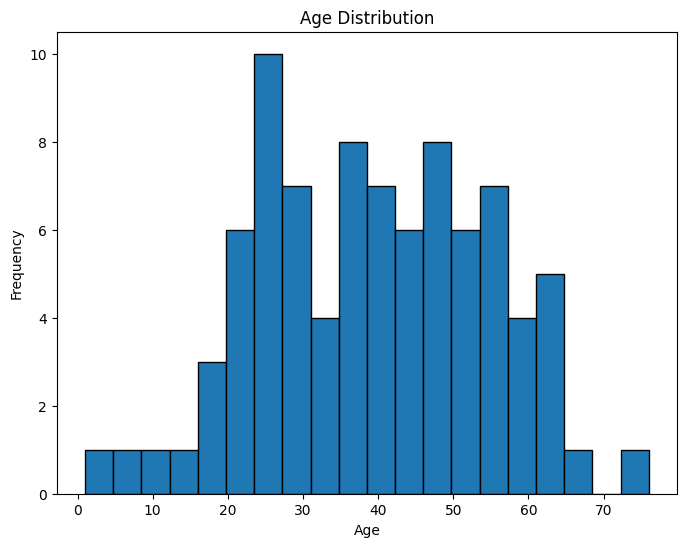

In [16]:
# Create a histogram for the distribution of ages.
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

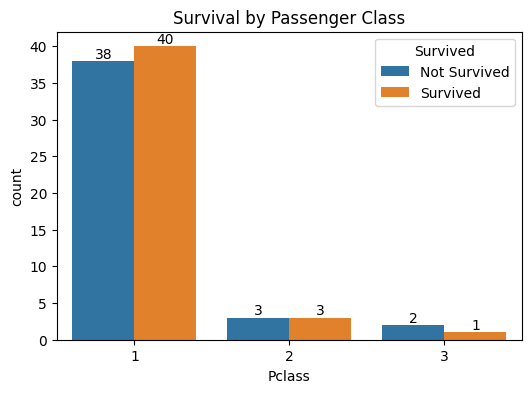

In [17]:
# Create a bar plot for survival based on passenger class (Pclass).
plt.figure(figsize=(6, 4))
splot = sns.countplot(x='Pclass', hue='Survived', data=df)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')
plt.title("Survival by Passenger Class")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()

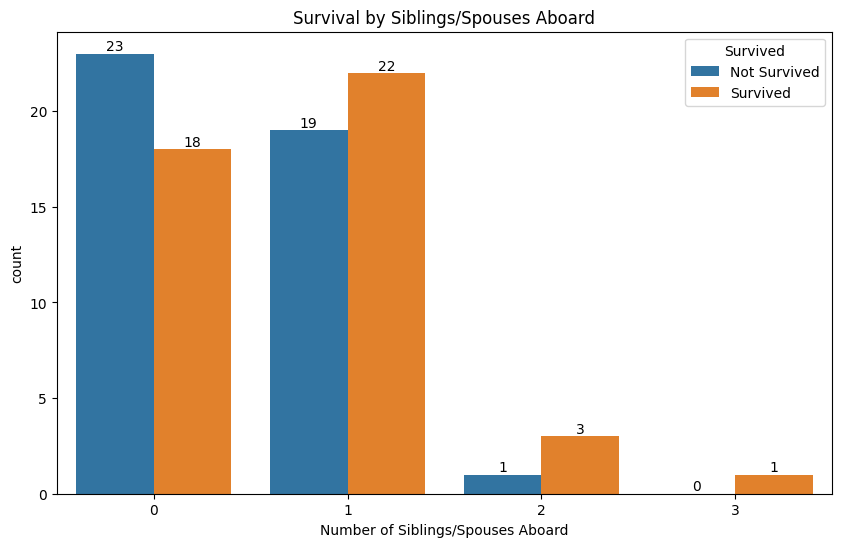

In [18]:
# Create a bar plot for survival based on the number of siblings/spouses aboard (SibSp).
plt.figure(figsize=(10, 6))
splot = sns.countplot(x='SibSp', hue='Survived', data=df)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')
plt.title("Survival by Siblings/Spouses Aboard")
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()

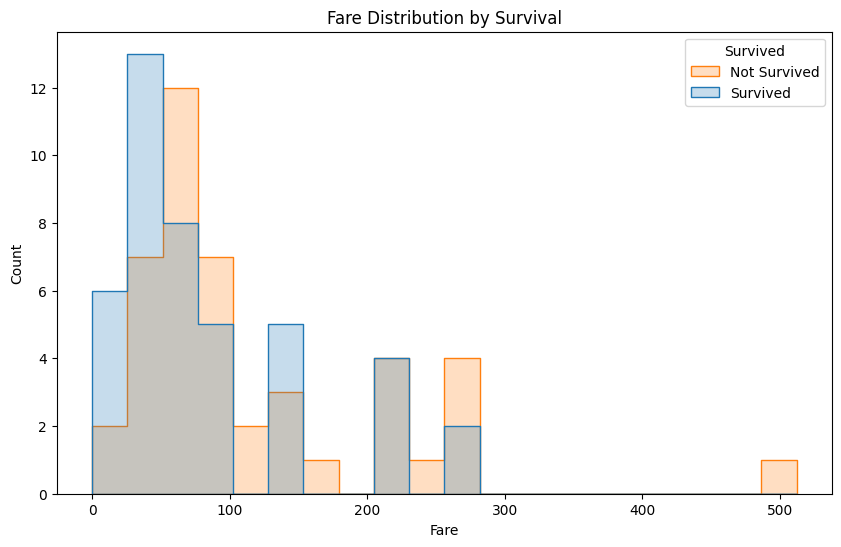

In [19]:
# Create a distribution plot for fare based on survival.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Survived', element='step', bins=20)
plt.title("Fare Distribution by Survival")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()

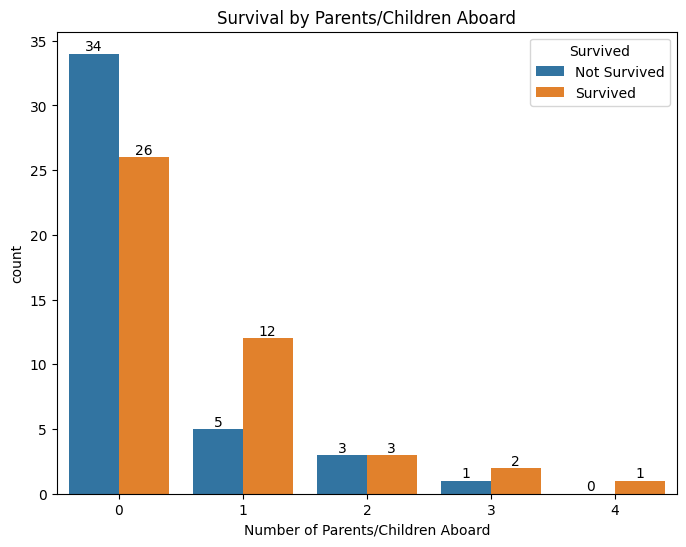

In [20]:
# Create a bar plot for survival based on the number of parents/children aboard (Parch).
plt.figure(figsize=(8, 6))
splot = sns.countplot(x='Parch', hue='Survived', data=df)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')
plt.title("Survival by Parents/Children Aboard")
plt.xlabel("Number of Parents/Children Aboard")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()

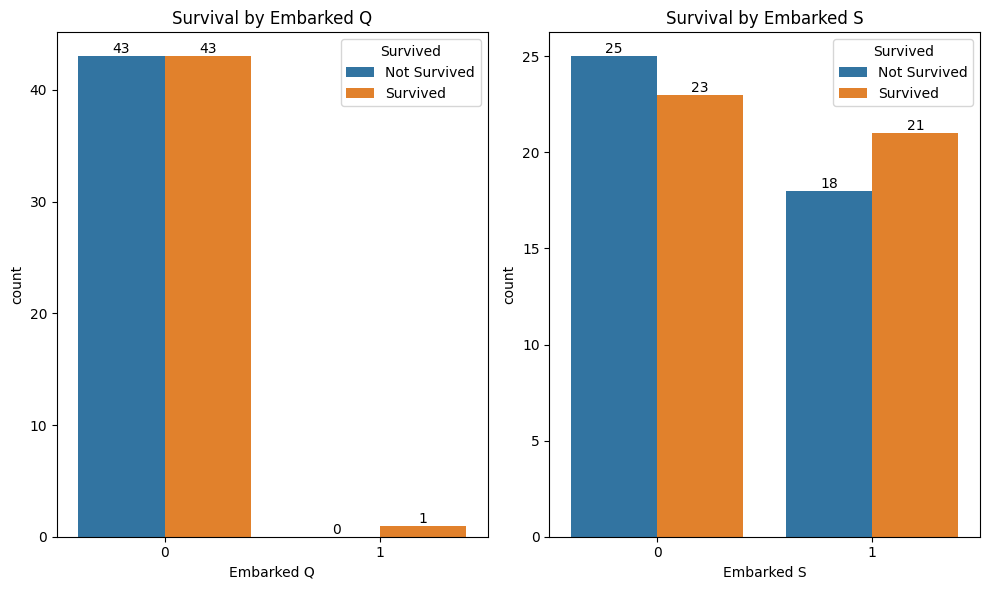

In [21]:
# Create bar plots for survival based on port of embarkation (Embarked_Q and Embarked_S).
plt.figure(figsize=(10, 6))

# Plot for Embarked_Q.
plt.subplot(1, 2, 1)
splot = sns.countplot(x='Embarked_Q', hue='Survived', data=df)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')
plt.title("Survival by Embarked Q")
plt.xlabel("Embarked Q")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])

# Plot for Embarked_S.
plt.subplot(1, 2, 2)
splot = sns.countplot(x='Embarked_S', hue='Survived', data=df)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')
plt.title("Survival by Embarked S")
plt.xlabel("Embarked S")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])

plt.tight_layout()
plt.show()

In [22]:
# Separate features and target variable.
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [23]:
# Standardize features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [24]:
# Make predictions.
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(f"{' '*18}Logistic Regression Report\n")
print(classification_report(y_test, y_pred))

                  Logistic Regression Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [25]:
# Checking the model.
input_data = [[1,23.0,1,0,82.2667,1,0,1]]

prediction = model.predict(input_data)
print(prediction)

[1]


0 - non survived

1 - survived



---

